In [86]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import os
from tensorflow.compat.v1.keras.preprocessing.image import ImageDataGenerator

class_dict = { 1 : 'grasp', 2 : 'cut', 3 : 'scoop', 4 : 'contain',
               5 : 'pound', 6 : 'support', 7 : 'wrap-grasp' }

def create_dataframe(path):
    items = sorted(os.listdir(path))
    xs, ys = [], []
    for i in np.arange(0, len(items), 2):
        # The second item is always the .jpg image, so take this as x
        xs.append(items[i+1])
        # The first one is the label which needs to be read from matlab
        y = loadmat(path+items[i])['gt_label']
        y = np.unique(y) # Get unique values
        y = y[np.nonzero(y)] # Remove 0 label
#         print(y)
        y = [class_dict[l] for l in y]
        ys.append(y)
#         print(y)
#         binary_y = np.zeros(7) # Create binary 1-D array of size 7
#         binary_y[y-1] = 1 # Populate with 1 at index of class
#         ys.append(list(binary_y))
    return pd.DataFrame({'X':xs, 'y':ys})

train_dir = '/mnt/e/Datasets/part-affordance-dataset-preprocessed/training/'
test_dir = '/mnt/e/Datasets/part-affordance-dataset-preprocessed/validation/'
train_df = create_dataframe(train_dir)
test_df = create_dataframe(test_dir)

In [87]:
train_df['y'][0]

['contain']

In [94]:
list(class_dict.values())

['grasp', 'cut', 'scoop', 'contain', 'pound', 'support', 'wrap-grasp']

In [98]:
# Build data generators with augmentation params
data_aug_params = dict(
    rescale=1./255,
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True)
train_datagen = ImageDataGenerator(**data_aug_params,
                                validation_split=0.15)
test_datagen = ImageDataGenerator(rescale=1./255.)

classes = list(class_dict.values())

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    directory = train_dir, 
    x_col = 'X', 
    y_col = 'y',
    subset = 'training',
    target_size = (130, 130),
#     seed = 42,
    classes = classes,
#     shuffle = True,
    batch_size = 32,
    class_mode = 'categorical')
valid_generator = train_datagen.flow_from_dataframe(
    train_df, 
    directory = train_dir, 
    x_col = 'X', 
    y_col = 'y',
    subset = 'validation',
    target_size = (130, 130),
#     seed = 42,
    classes = classes,
#     shuffle = True,
    batch_size = 32,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory = test_dir,
    x_col = 'X', 
    y_col = 'y',
    classes = classes,
    target_size=(130, 130),
    batch_size=32,
    class_mode='categorical')


Found 8448 validated image filenames belonging to 7 classes.
Found 1490 validated image filenames belonging to 7 classes.
Found 290 validated image filenames belonging to 7 classes.


In [99]:
x1, y1 = train_generator[0]

[1. 0. 0. 0. 0. 0. 1.]


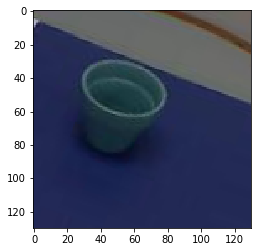

In [101]:
import matplotlib.pyplot as plt
plt.imshow(x1[0])
print(y1[0])